In [1]:
!pip uninstall -y eonacs && pip install  git+https://github.com/njnmco/smc #--log /dev/stderr

  Cloning https://github.com/njnmco/smc to /tmp/pip-req-build-oq2g5s4j
  Running command git clone -q https://github.com/njnmco/smc /tmp/pip-req-build-oq2g5s4j
     |████████████████████████████████| 3.5 MB 11.7 MB/s 
     |████████████████████████████████| 86 kB 6.6 MB/s 
     |████████████████████████████████| 596 kB 49.8 MB/s 
     |████████████████████████████████| 67 kB 5.9 MB/s 
     |████████████████████████████████| 895 kB 42.9 MB/s 
     |████████████████████████████████| 6.8 MB 40.4 MB/s 
     |████████████████████████████████| 1.1 MB 35.7 MB/s 
  Created wheel for eonacs: filename=eonacs-1.0.0-py3-none-any.whl size=2990 sha256=5e10105283a8bc1a584951c6abd1e530ebd5386488a43f5235a9a3b871c45224
  Stored in directory: /tmp/pip-ephem-wheel-cache-t39wohbt/wheels/6e/02/6d/470a51584ecf5233c1da27aab5d5e137df8b9ab9cc345b2a49
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=5994f322e85c6f056214e4a1ebd361584f2414839ad997f861a82a2b744a6e0b
  Sto

In [2]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,15)


In [3]:
import eonacs.common.util as util

util.colab_map_drive()


Mounted at /content/drive


In [4]:
con = util.onet_db()

In [5]:
import pandas as pd
import numpy as np
import torch

In [6]:
tasks = pd.read_sql("select distinct task from task_statements",   con)
#dwa = pd.read_sql("select * from dwa_reference",   con)

In [7]:
import eonacs.common.dbert as dbert


In [8]:
features = dbert.get_embeddings(tasks['task'])

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using cuda:0
0...
1024...
2048...
3072...
4096...
5120...
6144...
7168...
8192...
9216...
10240...
11264...
12288...
13312...
14336...
15360...
16384...
17408...


In [9]:
import eonacs.common.reduction as reduction

In [10]:
scale, reducer, embedding = reduction.reduction(features)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


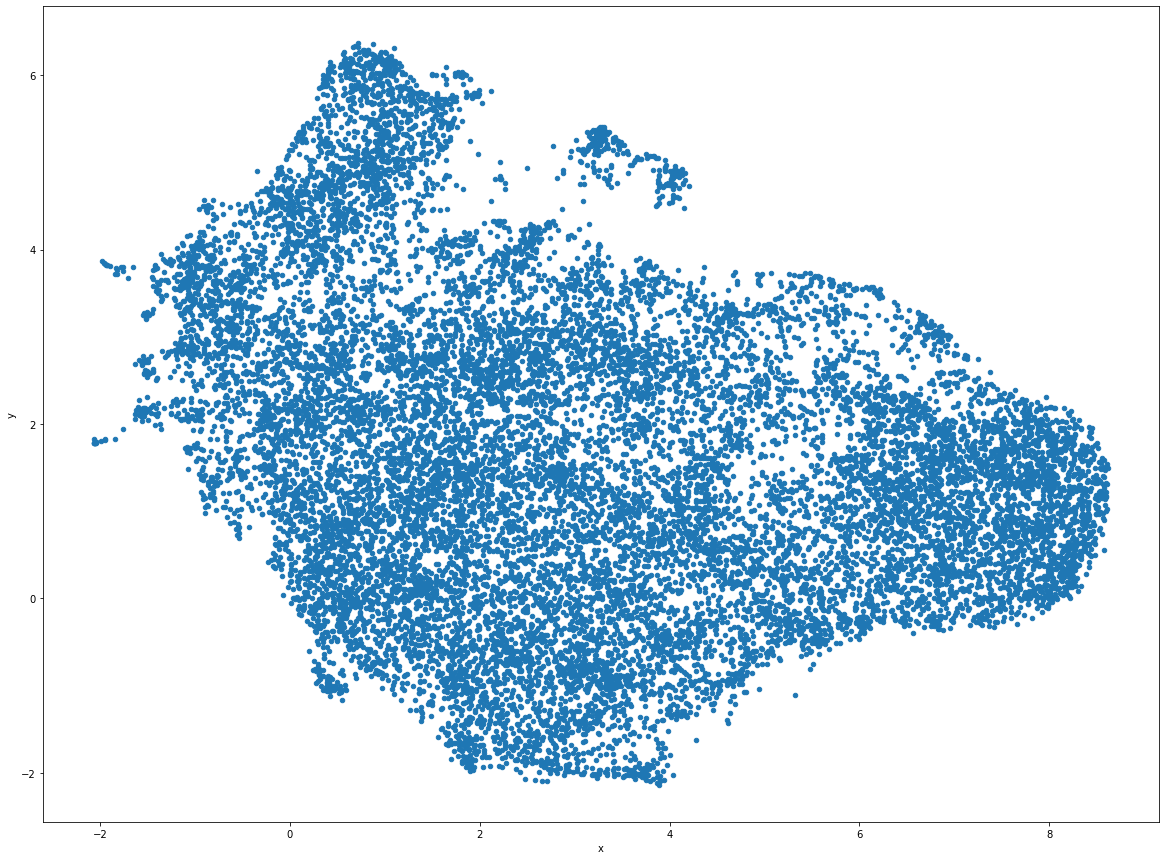

In [11]:
pd.DataFrame(embedding, columns=['x','y']).plot.scatter('x', 'y')

In [12]:
tasks15 = pd.read_sql("select distinct task from task_statements where onetsoc_code like '15-1%'",   con)


In [13]:
tasks15_features = dbert.get_embeddings(tasks15['task'])
tasks15_umap = reducer.transform(scale.transform(tasks15_features))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using cuda:0
0...


## SMC

In [14]:
def get_json(f):
  return json.load(open(f))

In [15]:
import os, glob, json

In [16]:
courses = [get_json(f) for f in glob.glob("/content/drive/MyDrive/smc/data/curricunet/*reportId=5.json") ]

In [17]:
courses[5]

{'course': 'COMPUTER SCIENCE 25, Embedded Systems',
 'course_objectives': ['Demonstrate an understanding of the basic principles and concepts that characterize an embedded system.',
  'Illustrate and identify the use of an embedded system in a real-world application.',
  'Apply the principles and concepts of embedded systems to real problems.',
  'Implement simple electronic circuits based on given schematics.',
  'Design and execute software to interface an embedded processor with external electronic circuitry.'],
 'file': 'data/curricunet/3155?reportId=5',
 'student_learning_outcomes': ['Design and create applications using the PBASIC programming language and apply the concept of controller to solve specific programming problems.',
  'Apply various functionality of  PBASIC to create software components.']}

In [18]:
co_features = dbert.get_embeddings(pd.Series(courses[5]['course_objectives']))
co_umap = reducer.transform(scale.transform(co_features))


slo_features = dbert.get_embeddings(pd.Series(courses[5]['student_learning_outcomes']))
slo_umap = reducer.transform(scale.transform(slo_features))


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using cuda:0
0...


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Using cuda:0
0...


In [18]:
co_umap

array([[ 2.5466576, -2.0779693],
       [ 4.4862375, -1.5376573],
       [ 3.189594 , -2.3594563],
       [ 4.4934683, -1.5126481],
       [ 3.9474628, -1.7854745]], dtype=float32)

In [19]:
import plotnine as p9

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


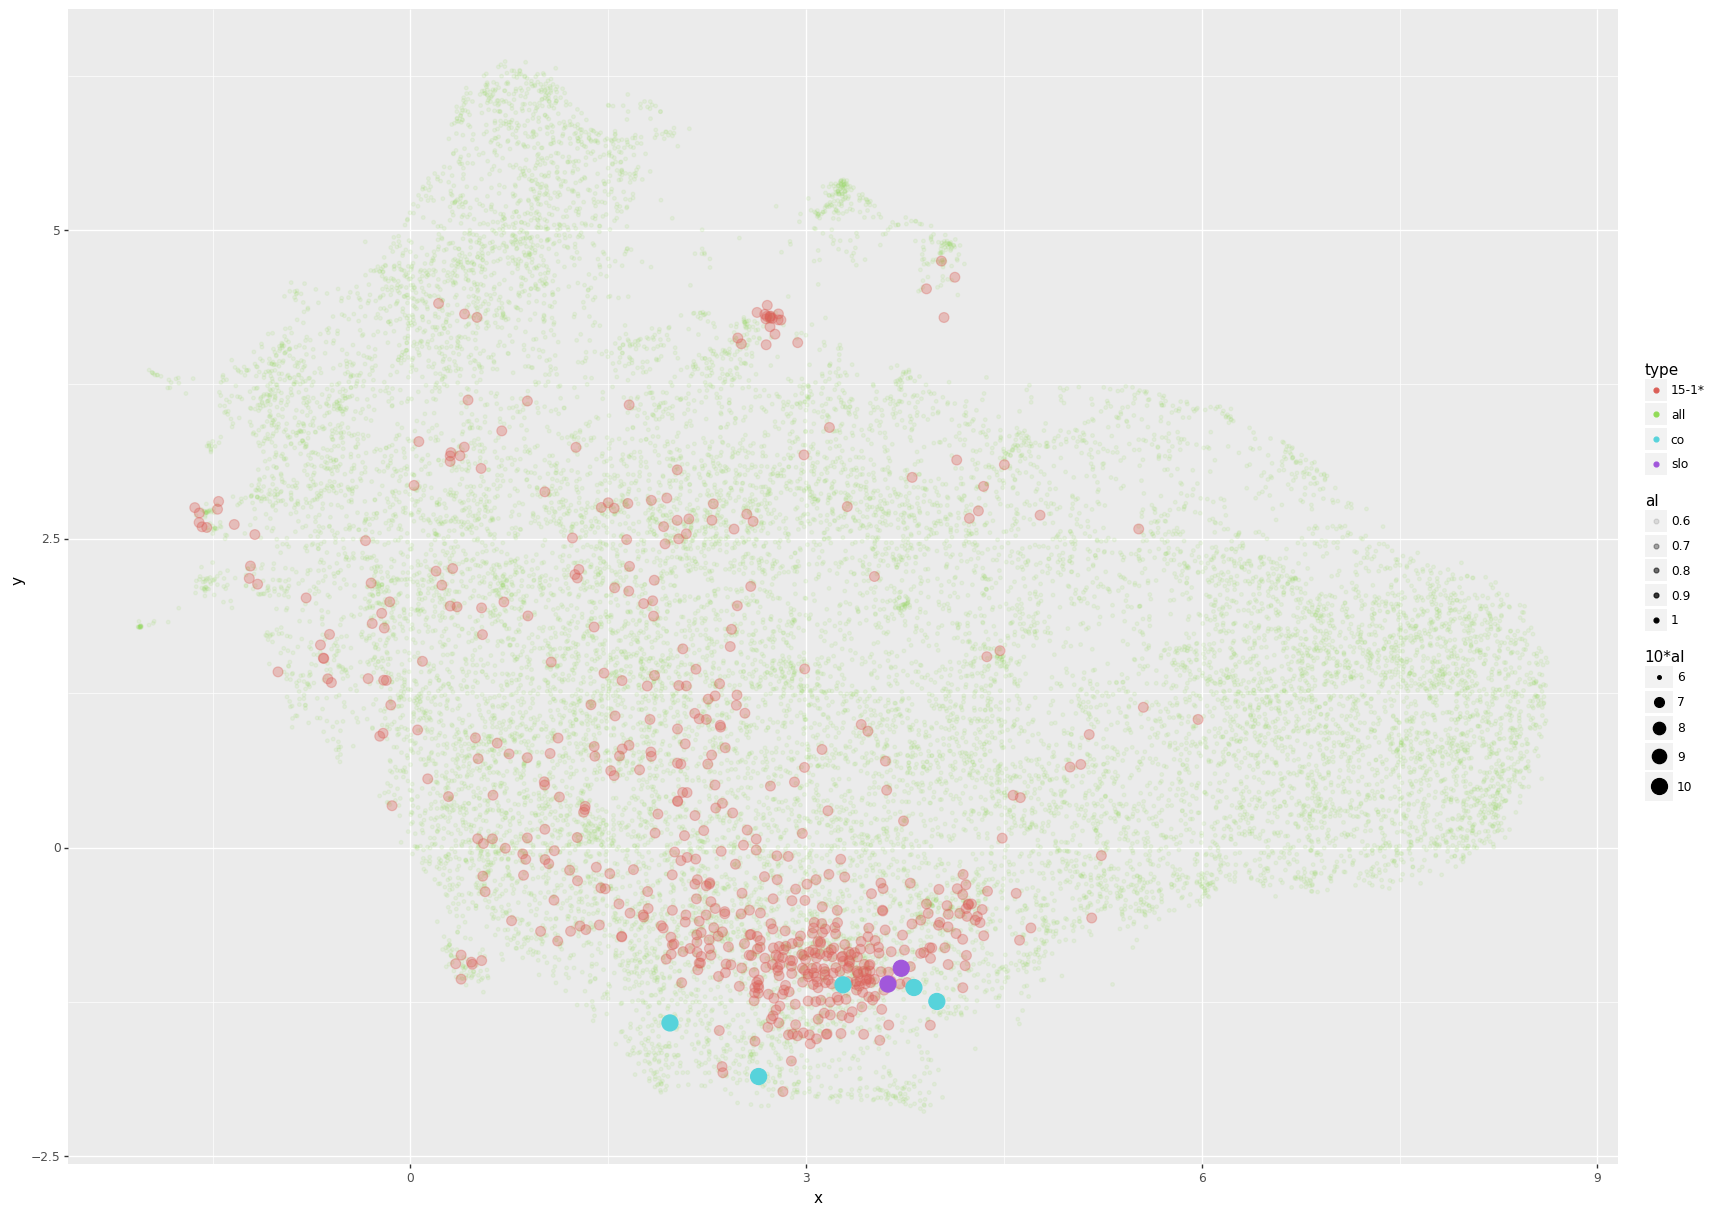

<ggplot: (8768698799473)>

In [28]:
p9.ggplot(pd.concat([
pd.DataFrame(embedding, columns=['x','y']).assign(type='all').assign(al=.6),
pd.DataFrame(tasks15_umap, columns=['x','y']).assign(type='15-1*').assign(al=.7),
pd.DataFrame(co_umap, columns=['x','y']).assign(type='co').assign(al=1),
pd.DataFrame(slo_umap, columns=['x','y']).assign(type='slo').assign(al=1),

])) + p9.aes(x="x", y="y", color="type", alpha="al", size="10*al") + p9.geom_point() +  p9.theme(figure_size = (20, 15))

In [31]:
D_slo_task15 = np.zeros((slo_umap.shape[0], tasks15_umap.shape[0]))

for i in range(slo_umap.shape[0]):
  mx, mxj = 99999999999, -1
  for j in range(tasks15_umap.shape[0]):
    D = np.linalg.norm(slo_umap[i,:] - tasks15_umap[j,:])
    D_slo_task15[i,j] = D
    if(D < mx):
      mx, mxj = D, j

  print(f"{mxj}: {mx}")
D_slo_task15

192: 0.033634502440690994
170: 0.07053732126951218


array([[1.50943696, 1.21840656, 0.84748036, ..., 4.33251286, 4.24838734,
        4.07538795],
       [1.5130415 , 1.06186652, 0.93740147, ..., 4.3171978 , 4.22729492,
        4.00377321]])

In [32]:
D_co_task15 = np.zeros((co_umap.shape[0], tasks15_umap.shape[0]))

for i in range(co_umap.shape[0]):
  mx, mxj = 99999999999, -1
  for j in range(tasks15_umap.shape[0]):
    D = np.linalg.norm(co_umap[i,:] - tasks15_umap[j,:])
    D_co_task15[i,j] = D
    if(D < mx):
      mx, mxj = D, j

  print(f"{mxj}: {mx}")
D_co_task15

469: 0.33769768476486206
515: 0.021792730316519737
89: 0.2210681438446045
361: 0.19891473650932312
274: 0.01679094135761261


array([[1.3779242 , 2.8270576 , 0.93152398, ..., 3.65143752, 3.63333654,
        4.01871252],
       [1.68155754, 1.08730304, 1.04636335, ..., 4.49381065, 4.40549946,
        4.18634033],
       [1.72799349, 2.45207787, 0.89451224, ..., 4.33698416, 4.30014753,
        4.51006794],
       [1.88842523, 1.06196558, 1.23841023, ..., 4.69790697, 4.6082902 ,
        4.36693573],
       [1.27208304, 1.50754249, 0.51533872, ..., 4.10158968, 4.02706289,
        3.95103312]])

In [33]:



tasks15_umap[D_slo_task15.argmin(axis=1), : ]

array([[ 3.6442974, -1.0809221],
       [ 3.7900355, -0.9630023]], dtype=float32)

In [50]:
extrema = pd.concat([

pd.DataFrame(D_slo_task15).rank(axis=1),
pd.DataFrame(-D_slo_task15).rank(axis=1)
]).min() <= 10

In [52]:
co_distances = pd.DataFrame(D_co_task15.T, columns=courses[5]['course_objectives']).assign(task=tasks15['task'])

In [55]:
co_distances[extrema].to_csv("/content/drive/MyDrive/smc/data/co_cs5.csv")